In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
housing = pd.read_csv('.//housing.csv')

In [90]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [91]:
housing.iloc[3, [0, 1, 3]]

longitude     -122.25
latitude        37.85
total_rooms      1274
Name: 3, dtype: object

In [92]:
housing.loc[3, ['longitude', 'latitude', 'total_rooms']]

longitude     -122.25
latitude        37.85
total_rooms      1274
Name: 3, dtype: object

In [93]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [94]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [95]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4F00B4E10>,
      dtype=object)

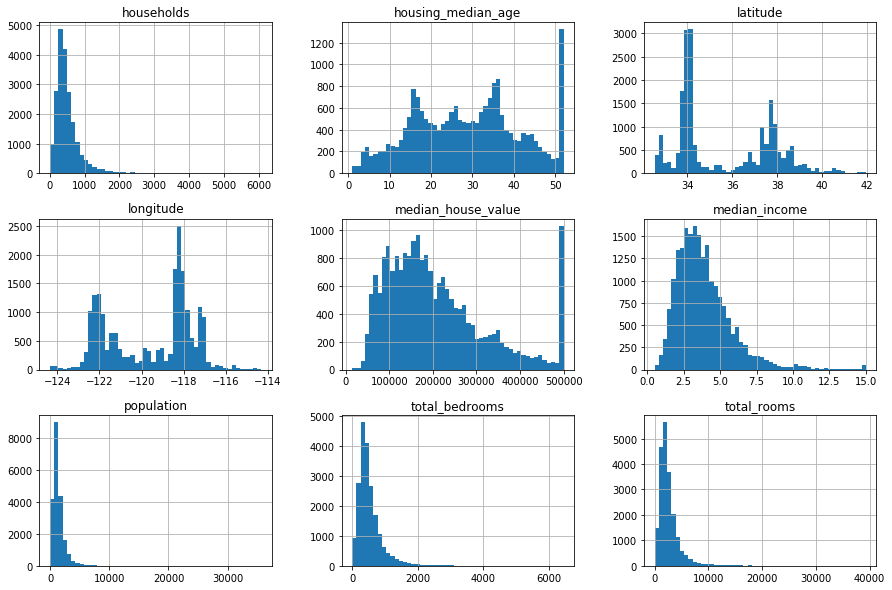

In [96]:
housing.hist(bins=50, figsize=(15, 10))

# Stratified Splitting
# Karl Pearson's correlation coeficient

In [97]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [98]:
housing_price_corr = housing.corr()['median_house_value']

In [99]:
housing_price_corr.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [100]:
np.ceil(housing['median_income'] / 1.5).value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: median_income, dtype: int64

In [101]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)

In [102]:
housing['income_cat'].where(housing['income_cat'] < 5, 5, inplace=True)

In [103]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [104]:
from sklearn.model_selection import StratifiedShuffleSplit

In [105]:
split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)

In [106]:
for train_ix, test_ix in split.split(housing, housing['income_cat']):
    train_housing = housing.iloc[train_ix]
    test_housing = housing.iloc[test_ix]

In [107]:
train_housing['income_cat'].value_counts() / len(train_housing)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [108]:
test_housing['income_cat'].value_counts() / len(test_housing)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [109]:
train_housing.drop('income_cat', axis=1, inplace=True)

C:\Users\sumit\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [110]:
train_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 5288 to 18453
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16348 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [111]:
test_housing.drop('income_cat', axis=1, inplace=True)

C:\Users\sumit\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [112]:
train_X = train_housing.drop('median_house_value', axis=1)

In [113]:
train_y = train_housing['median_house_value'].copy()

In [114]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 5288 to 18453
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16348 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [115]:
train_X_num = train_X.drop('ocean_proximity', axis=1)

In [116]:
ocean_proximity = train_housing['ocean_proximity']

In [123]:
from sklearn.preprocessing import Imputer

In [125]:
imputer = Imputer(strategy='median')

In [126]:
train_X_num = imputer.fit_transform(train_X_num)

In [132]:
from sklearn.preprocessing import OrdinalEncoder

ImportError: cannot import name 'OrdinalEncoder'

In [128]:
ord_encoder = OrdinalEncoder()

NameError: name 'OrdinalEncoder' is not defined

In [ ]:
ocean_proximity_encoded = ord_encoder.fit_transform(ocean_proximity.values.reshape(-1, 1))

In [133]:
ocean_proximity_encoded[:10]

NameError: name 'ocean_proximity_encoded' is not defined

In [134]:
ocean_proximity.value_counts()

<1H OCEAN     7307
INLAND        5249
NEAR OCEAN    2143
NEAR BAY      1810
ISLAND           3
Name: ocean_proximity, dtype: int64

In [135]:
from sklearn.preprocessing import OneHotEncoder

In [136]:
hot_encoder = OneHotEncoder()

In [137]:
ocean_proximity_hot_encoded = hot_encoder.fit_transform(ocean_proximity.values.reshape(-1, 1))

ValueError: could not convert string to float: '<1H OCEAN'

In [138]:
type(ocean_proximity_hot_encoded)

NameError: name 'ocean_proximity_hot_encoded' is not defined

In [139]:
ocean_proximity_hot_encoded_ndarray = ocean_proximity_hot_encoded.toarray()

NameError: name 'ocean_proximity_hot_encoded' is not defined

In [140]:
from sklearn.base import BaseEstimator, TransformerMixin

In [141]:
class DataframeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.cols].values

In [142]:
train_X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [143]:
selector = DataframeSelector(cols=train_X.columns[:-1])

In [144]:
train_X_num2 = selector.fit_transform(train_X)

In [145]:
selector2 = DataframeSelector(cols=['ocean_proximity'])

In [146]:
train_X_cat = selector2.fit_transform(train_X)

In [147]:
train_X_cat

array([['<1H OCEAN'],
       ['INLAND'],
       ['<1H OCEAN'],
       ...,
       ['<1H OCEAN'],
       ['NEAR BAY'],
       ['<1H OCEAN']], dtype=object)

In [148]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

In [151]:
pipe1 = Pipeline(
    [('selector', DataframeSelector(cols=train_X.columns[:-1])),
    ('imputer', Imputer(strategy='median')),
    ('scaler', StandardScaler())]
)

In [152]:
pipe2 = Pipeline(
    [('selector', DataframeSelector(cols=['ocean_proximity'])),
     ('hot_encoder', OneHotEncoder(sparse=False))
    ]
)

In [153]:
pipe = FeatureUnion([
    ('pipe1', pipe1),
    ('pipe2', pipe2)
])

In [154]:
train_X_processed = pipe.fit_transform(train_X)

ValueError: could not convert string to float: '<1H OCEAN'

In [155]:
train_X_processed.shape

NameError: name 'train_X_processed' is not defined